In [2]:


import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import segment
from segment.segment import Segment
from segment_processor.segment_processor import SegmentProcessor
from visualize.visualize import Animator

import imp
imp.reload(segment)

# Tori (App Gap)
df = pd.read_csv('data/2022-09-02-173454-ELEMNT BOLT 981E-274-0/test.records.csv')
segment_bounds_sec = (3468, 4742)
weight_kg = 57

# Robbie (App Gap)
# df = pd.read_csv('data/2022-09-02-173457-ELEMNT_BOLT_B471-1171-0/test.records.csv')
# segment_bounds_sec = (3428, 4653)
# weight_kg = 80

s = Segment(df, segment_bounds_sec[0], segment_bounds_sec[1])

p = SegmentProcessor(s, rider_weight_kg = weight_kg, equipment_weight_kg=12)
(time_sec, dist_m, total_times, remaining_times) = p.power_based_finish_time()

elevation_m = s.segment_df["alt_m"].values
actual_time = s.segment_df["sec"].values[-1] - s.segment_df["sec"].values[0]



/var/folders/22/8_bb3zp17lb4d61r0d8tzc400000gq/T/ipykernel_34620/902685249.py:11: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


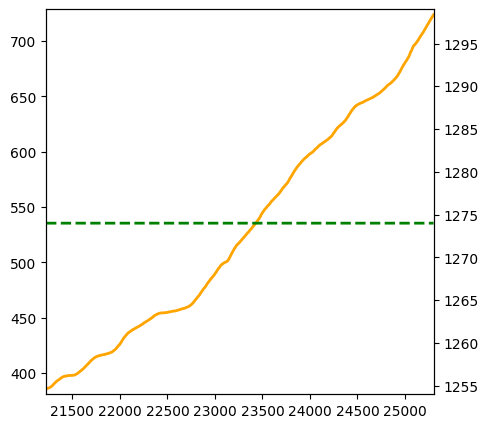

In [17]:
from matplotlib import animation
fig, ax = plt.subplots(figsize=(5, 5))
ax2 = ax.twinx()

ax.set_ylim([np.min(elevation_m) - 5, np.max(elevation_m) + 5])
ax.set_xlim([np.min(dist_m), np.max(dist_m)])
ax2.set_ylim([np.min(total_times) - 5, np.max(total_times) + 5])

(elevation_line,) = ax.plot(
    dist_m,
    elevation_m,
    color="orange",
    lw=2,
    label="Elevation Profile",
)
(locator_dot,) = ax.plot(
    np.nan, np.nan, marker="o", color="blue", label="Current Location"
)

(target_line,) = ax2.plot(
    dist_m,
    actual_time * np.ones(len(dist_m)),
    color="green",
    linestyle="dashed",
    lw=2,
    label="Target Time",
)
(time_line,) = ax2.plot([], [], color="red", lw=2)

def animate_func(i):
    locator_dot.set_data(time[i], elevation[i])
    time_line.set_data(time[0 : i + 1], est[0 : i + 1])
    return locator_dot, time_line

def init_fun():
    locator_dot.set_data([], [])
    time_line.set_data(np.nan, np.nan)
    return locator_dot, time_line

line_ani = animation.FuncAnimation(
    fig,
    animate_func,
    frames=len(distance),
    repeat=True,
    blit=True,
    init_func=init_fun,
)

# plt.show()




/Users/toriwuthrich/.pyenv/versions/3.10.6/lib/python3.10/site-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


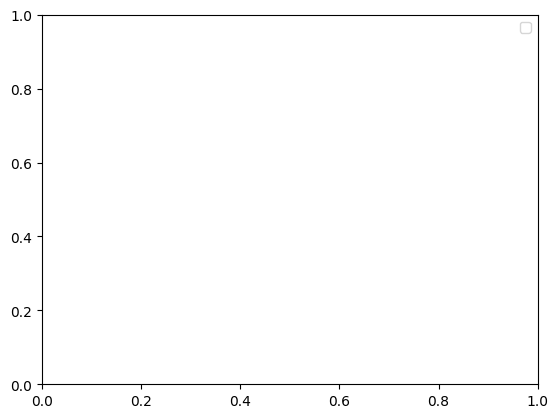

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation

distance = s.segment_df["dist_m"]
s.segment_df.columns
elevation = s.segment_df["alt_m"]

def animate_func(i):
    ax.clear()
    ax.plot(distance[0:i], elevation[0:i])
    # ax.plot(distance[i], elevation[i])
    
fig = plt.figure()
ax = plt.axes()
line_ani = animation.FuncAnimation(fig, animate_func, interval=100, frames=len(distance))

plt.legend()
plt.show()

# f = r"c://Users/toriwuthrich/Desktop/animate_func.gif"
# writergif = animation.PillowWriter(fps=len(distance)/6)
# line_ani.save(f, writer=writergif)

plt.show()

    